In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm

if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
global target_order
global temp_list
temp_list = []
Agent_number_n=4;
Alpha = (1-0.700);

# torch.manual_seed(1)    # reproducible
# np.random.seed(1)



In [3]:
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(50000):
        appen_train(sorted(np.random.rand(Agent_number_n), reverse=True));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
#     devided=20
#     for i1 in range(devided+1):
#         for i2 in range(i1+1):
#             for i3 in range(i2+1):
#                 appen_test(i1/devided,i2/devided,i3/devided);
    for i in range(50000):
        appen_test(sorted(np.random.rand(Agent_number_n), reverse=True));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.68915775 0.13342484 0.08468059]
  [0.92993767 0.13342484 0.08468059]
  [0.92993767 0.68915775 0.08468059]
  [0.92993767 0.68915775 0.13342484]]

 [[0.83103509 0.82771585 0.80800915]
  [0.98407681 0.82771585 0.80800915]
  [0.98407681 0.83103509 0.80800915]
  [0.98407681 0.83103509 0.82771585]]

 [[0.85230346 0.29890253 0.22720868]
  [0.87977717 0.29890253 0.22720868]
  [0.87977717 0.85230346 0.22720868]
  [0.87977717 0.85230346 0.29890253]]

 ...

 [[0.80562974 0.20923524 0.01415388]
  [0.84700534 0.20923524 0.01415388]
  [0.84700534 0.80562974 0.01415388]
  [0.84700534 0.80562974 0.20923524]]

 [[0.79012924 0.39641391 0.17032705]
  [0.87737588 0.39641391 0.17032705]
  [0.87737588 0.79012924 0.17032705]
  [0.87737588 0.79012924 0.39641391]]

 [[0.85040973 0.58508898 0.21861156]
  [0.89396161 0.58508898 0.21861156]
  [0.89396161 0.85040973 0.21861156]
  [0.89396161 0.85040973 0.58508898]]]
[[[0.40971669 0.35758063 0.04451949]
  [0.76431769 0.35758063 0.04451949]
  [0.76431769 0.4097

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

3.3731989354196426 2.999999999999999 0.37319893541964344


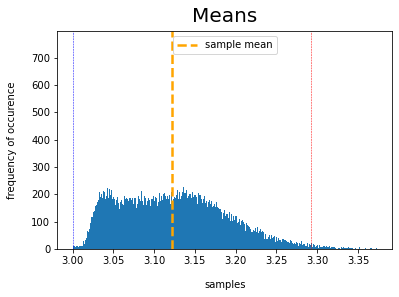

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight, gain=torch.nn.init.calculate_gain('relu'))
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.xavier_normal_(m.weight, gain=torch.nn.init.calculate_gain('relu'))
        torch.nn.init.uniform_(m.bias, a=-1.0, b=1.0)

class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        
        self.input_dim = Agent_number_n-1
        self.hidden_dim = 20
        self.output_dim = 1
        self.hidden_layer_count = 4 
        
        current_dim = self.input_dim
        self.layers = torch.nn.ModuleList()
        for i in range(self.hidden_layer_count):
            self.layers.append(torch.nn.Linear(current_dim, self.hidden_dim))
            current_dim = self.hidden_dim
        self.layers.append(torch.nn.Linear(current_dim, self.output_dim))

    def calculate(self, value_list):
        h = value_list
        for layer in self.layers:
            h = torch.relu(layer(h))
        return h

    def forward(self, input_list,input_label):
        global iteration,echo
        loss1 = 0
        loss2 = 0
        input_list = torch.from_numpy(
            np.array(input_list)).cuda().type(torch.float32)
        h_list = []
        for i in range(Agent_number_n):
            h = self.calculate(input_list[i])
            h_list.append(h)
        
        input_label = torch.from_numpy(
            np.array(input_label)).cuda().type(torch.float32)
        sum_h = torch.sum(torch.cat(h_list)).cuda()
        
        
        loss1 = torch.where((Agent_number_n-1)*input_label>sum_h,
                        torch.square((Agent_number_n-1)*input_label-sum_h),
                        torch.zeros(1).cuda()
                      )

        loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                        torch.square(sum_h-(Agent_number_n-Alpha)*input_label),
                        torch.zeros(1).cuda()
                      )
                      

        return loss1,loss2,h_list

In [7]:
random.seed(2000)
torch.manual_seed(256)
net  = Net()
net.apply(weight_init)

net = torch.load("save/Deep_learning_4")
net.to(dev)

Net(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [8]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00001)
optimizer = opt.Adam(net.parameters(), lr=0.00005)

batch_size = 128
echo = 10

In [9]:
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        loss2_list = []
        loss1_sum = 0
        loss2_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number,len(training_data))):
            h_loss1,h_loss2,h_list = net(training_data[index],training_label[index])
            denominator += 1
            loss1_sum += h_loss1
            loss2_sum += h_loss2
            
        loss_sum = loss1_sum + loss2_sum
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.02):
            print(temp_number,loss,float(loss1_sum),float(loss2_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()

6096 tensor([0.0006], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.07892870903015137
6858 tensor([3.0151e-05], device='cuda:0', grad_fn=<DivBackward0>) 0.0038593041244894266 0.0
8763 tensor([2.4667e-05], device='cuda:0', grad_fn=<DivBackward0>) 0.003157317638397217 0.0
10414 tensor([0.0003], device='cuda:0', grad_fn=<DivBackward0>) 0.0003346477751620114 0.04183473810553551
11811 tensor([0.0001], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.014089942909777164
17907 tensor([0.0014], device='cuda:0', grad_fn=<DivBackward0>) 0.17351919412612915 0.0010134262265637517
23114 tensor([0.0001], device='cuda:0', grad_fn=<DivBackward0>) 0.018888656049966812 0.0
26416 tensor([1.5088e-05], device='cuda:0', grad_fn=<DivBackward0>) 1.6933520328166196e-06 0.0019296192331239581
29337 tensor([0.0001], device='cuda:0', grad_fn=<DivBackward0>) 0.0017701833276078105 0.015094384551048279
32512 tensor([1.8990e-05], device='cuda:0', grad_fn=<DivBackward0>) 0.0024307703133672476 0.0
33401 tensor([0.], devic

25908 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
33274 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
36195 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
36449 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
49999 tensor([8.5837e-09], device='cuda:0', grad_fn=<DivBackward0>) 7.639503110112855e-07 0.0
batch iteration 12
batch_loss: 0.00 

3810 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
6350 tensor([1.0252e-07], device='cuda:0', grad_fn=<DivBackward0>) 1.3122737072990276e-05 0.0
7493 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
9398 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
13081 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
28829 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
37211 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
37465 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
39624 tensor([0.], device='cu

In [10]:
torch.save(net, "save/Deep_learning_4")

In [11]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    



In [12]:
print(torch.tensor(testing_data[2][i]).cuda().type(torch.float32))

tensor([0.9620, 0.8033, 0.2743], device='cuda:0')


In [13]:
h = net.calculate(torch.tensor(testing_data[2][i]).cuda().type(torch.float32))
print(h)

tensor([2.3324], device='cuda:0', grad_fn=<ReluBackward0>)


In [14]:
print(max(result_list),min(result_list),max(result_list)-min(result_list))

3.70862478017807 2.9273587465286255 0.7812660336494446


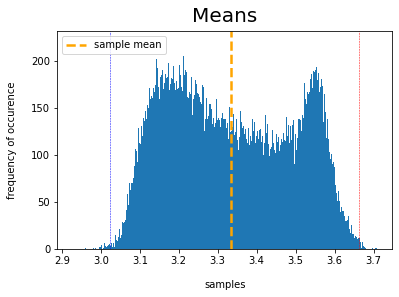

In [15]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.001)], linestyle='--', linewidth=0.5, label="0.1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.999)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()